# Introduction to Computational Science
# Assignment 2

## Gillespie Algorithm

1. Generate two random numbers between 0 and 1
2. Estimate time until next event based on cumulative rates of all possible events.
3. Convert event rates into probabilities by randomly selecting one of these events.
4. Repeat this process to iterate the model through time.


### Events:
1. Birth X→X+1
2. Transmission Y→Y+ 1 and X→X−1
3. Recovery Y→Y−1 and Z→Z+1
4. Death, three independent events, X→X − 1, Y → Y− 1, Z→Z−1

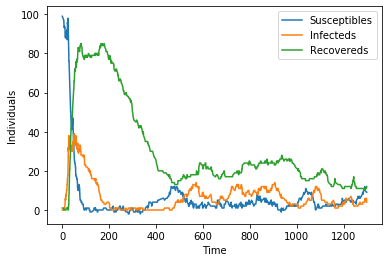

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Initialize variables
beta = 1/3
gamma = 0.01
mu = 0.003
N = 100
X = 99
Y = 1
Z = 0
T = 0

# Label events
E1, E2, E3, E4, E5, E6 = [1,2,3,4,5,6]

# Get random numbers
for i in range(6):
    r = np.random.rand()

def get_rates(X, Y, Z):
    """
    Determine at which rate an event occurs.
    """
    rate_E1 = mu * N
    rate_E2 = beta * X * Y / N
    rate_E3 = gamma * Y 
    rate_E4 = mu * X 
    rate_E5 = mu * Y 
    rate_E6 = mu * Z 
    
    events = [rate_E1, rate_E2, rate_E3, rate_E4, rate_E5, rate_E6]
        
    return events
    

def gillespie(X, Y, Z, T):
    """
    Choose the next time and event.
    """

    # Generate two random numbers between 0 and 1.
    random_time = np.random.rand()
    
    events = get_rates(X, Y, Z)
    
    Rtotal = sum(events)

    # Get reaction time
    tau = (1.0/Rtotal) * np.log((1.0/random_time))
    T += tau
    
    # Determine which event occurs 
    # Make list of reaction intervals
    rates = []
    for i in events:
        rates.append(i/Rtotal)
    
    random_event = random.uniform(0, max(rates))
    
    # Find event to be executed based on closest number to 
    # a random number in rates-array 
    found = find_nearest(rates, random_event)
    
    # Retrieve which event is related to this interval
    for k in range(len(rates)):
        if rates[k] == found:
            index = k
            break

    # Birth
    if index == 0:
        X += 1

    # Transmission
    elif index == 1:
        Y += 1
        X -= 1

    # Recovery
    elif index == 2:
        Z += 1
        Y -= 1

    # Death 
    elif index == 3:
        X -= 1
    elif index == 4:
        Y -= 1
    else:
        Z -= 1
        
    return X, Y, Z, T


def find_nearest(array, value):
    """
    Find nearest value in array.
    """
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


plots = []
time = []

for i in range(1000):
    X, Y, Z, T = gillespie(X, Y, Z, T)
    plots.append([X, Y, Z])
    time.append(T)

# plt.plot(time, Xs)
plt.plot(time, plots)
plt.legend(['Susceptibles','Infecteds','Recovereds'], loc="upper right")
plt.xlabel("Time")
plt.ylabel("Individuals")
plt.show()


## 5 hallmarks of stochastic SIR dynamics:
## Variability, negative covariances, increased transients, stochastic resonance and extinctions.

### (uit het boek, blz 191):
### Variability: 
#### It is generally impossible to predetermine the precise disease prevalence at any given point in the future.

### Negative covariances: 
#### Noise in the transmission term causes variance in the number of infecteds and in the number of susceptibles, and negative covariance between them. The magnitude of these values increases almost linearly with the variance of the noise.

### Increased transients:
#### TODO